### Distribution of Makespan by Model
This boxplot visualizes the distribution of makespan values for each model. The x-axis shows the different models (renamed for clarity), and the y-axis represents the makespan values. The plot uses grey tones for a neutral appearance, and the x-axis labels are smaller for better readability. The column name is omitted for a cleaner look. This visualization helps compare the spread and central tendency of makespan across models.

<Figure size 3200x2000 with 0 Axes>

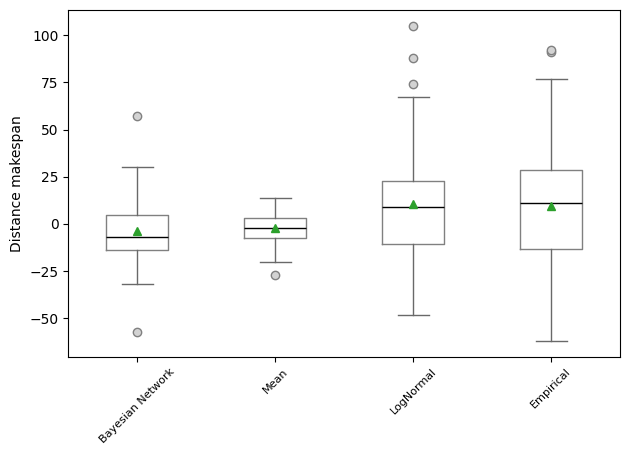

In [95]:
import pandas as pd
import matplotlib.pyplot as plt

# Read CSV (adjust path as needed)
#Current implemted run
#df = pd.read_csv('output/experiments/20250505_151952/experiment_results_20250505_151952.csv')
df = pd.read_csv('output/experiments/20250505_215818/experiment_results_20250505_215818.csv')

# Define new model names for x-axis and desired order
model_rename = {
    'TruthModel': 'Static Duration',
    'CausalContinousSmallLogCopyModel': 'Bayesian Network',
    'AverageOperationModel': 'Mean',
    'LogNormalDistributionModel': 'LogNormal',
    'HistoDistributionModel': 'Empirical',
}
desired_order = ['Bayesian Network', 'Mean', 'LogNormal', 'Empirical']

df['Model_renamed'] = df['Model'].map(model_rename)
df['Model_renamed'] = pd.Categorical(df['Model_renamed'], categories=desired_order, ordered=True)


# Boxplot in grey tones with higher DPI and smaller x-axis labels, no column name
plt.figure(figsize=(8,5), dpi=400)
box = df.boxplot(column='makespan', by='Model_renamed', grid=False, showfliers=True,
                 showmeans=True,
                 boxprops=dict(color='gray'),
                 whiskerprops=dict(color='dimgray'),
                 capprops=dict(color='dimgray'),
                 medianprops=dict(color='black'),
                 flierprops=dict(markerfacecolor='lightgray', markeredgecolor='gray'))
plt.title('', fontsize=12)
plt.suptitle('')
plt.xlabel('')
plt.ylabel('Distance makespan')  # Remove column name from y-axis
plt.xticks(rotation=45, fontsize=8)  # Make x-axis values smaller
plt.tight_layout()
plt.savefig("makespan_dif.svg", format="svg")
plt.show()

In [96]:
import tabulate
describe_table = df.groupby("Model").describe()
results = describe_table.xs('mean', level=1, axis=1)
print(tabulate.tabulate(results, headers='keys', tablefmt='rounded_outline'))

╭──────────────────────────────────────┬─────────────┬──────────────┬─────────────────────┬─────────────────────┬───────────────────┬──────────────────┬───────────────────┬────────┬────────────╮
│ Model                                │    makespan │   throughput │   avg_abs_start_dev │   avg_duration_diff │   levenshtein_seq │   leven_a3_0_seq │   toolchange_perc │   seed │   instance │
├──────────────────────────────────────┼─────────────┼──────────────┼─────────────────────┼─────────────────────┼───────────────────┼──────────────────┼───────────────────┼────────┼────────────┤
│ AverageOperationModel                │    -2.14667 │    -4.12667  │           10.7027   │             4.56587 │           6.00004 │          18      │           47.8108 │    114 │       2000 │
│ CausalContinousSmallLogCopyModel     │    -3.86667 │     0.273333 │            9.63467  │             4.56587 │           5.61335 │          16.84   │           49.8197 │    114 │       2000 │
│ HistoDistributionModel 

/tmp/ipykernel_3728568/1636877489.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(
/tmp/ipykernel_3728568/1636877489.py:8: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  ax = sns.boxplot(
/tmp/ipykernel_3728568/1636877489.py:35: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  means = df.groupby('Model_renamed')['throughput'].mean()
/tmp/ipykernel_3728568/1636877489.py:36: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this

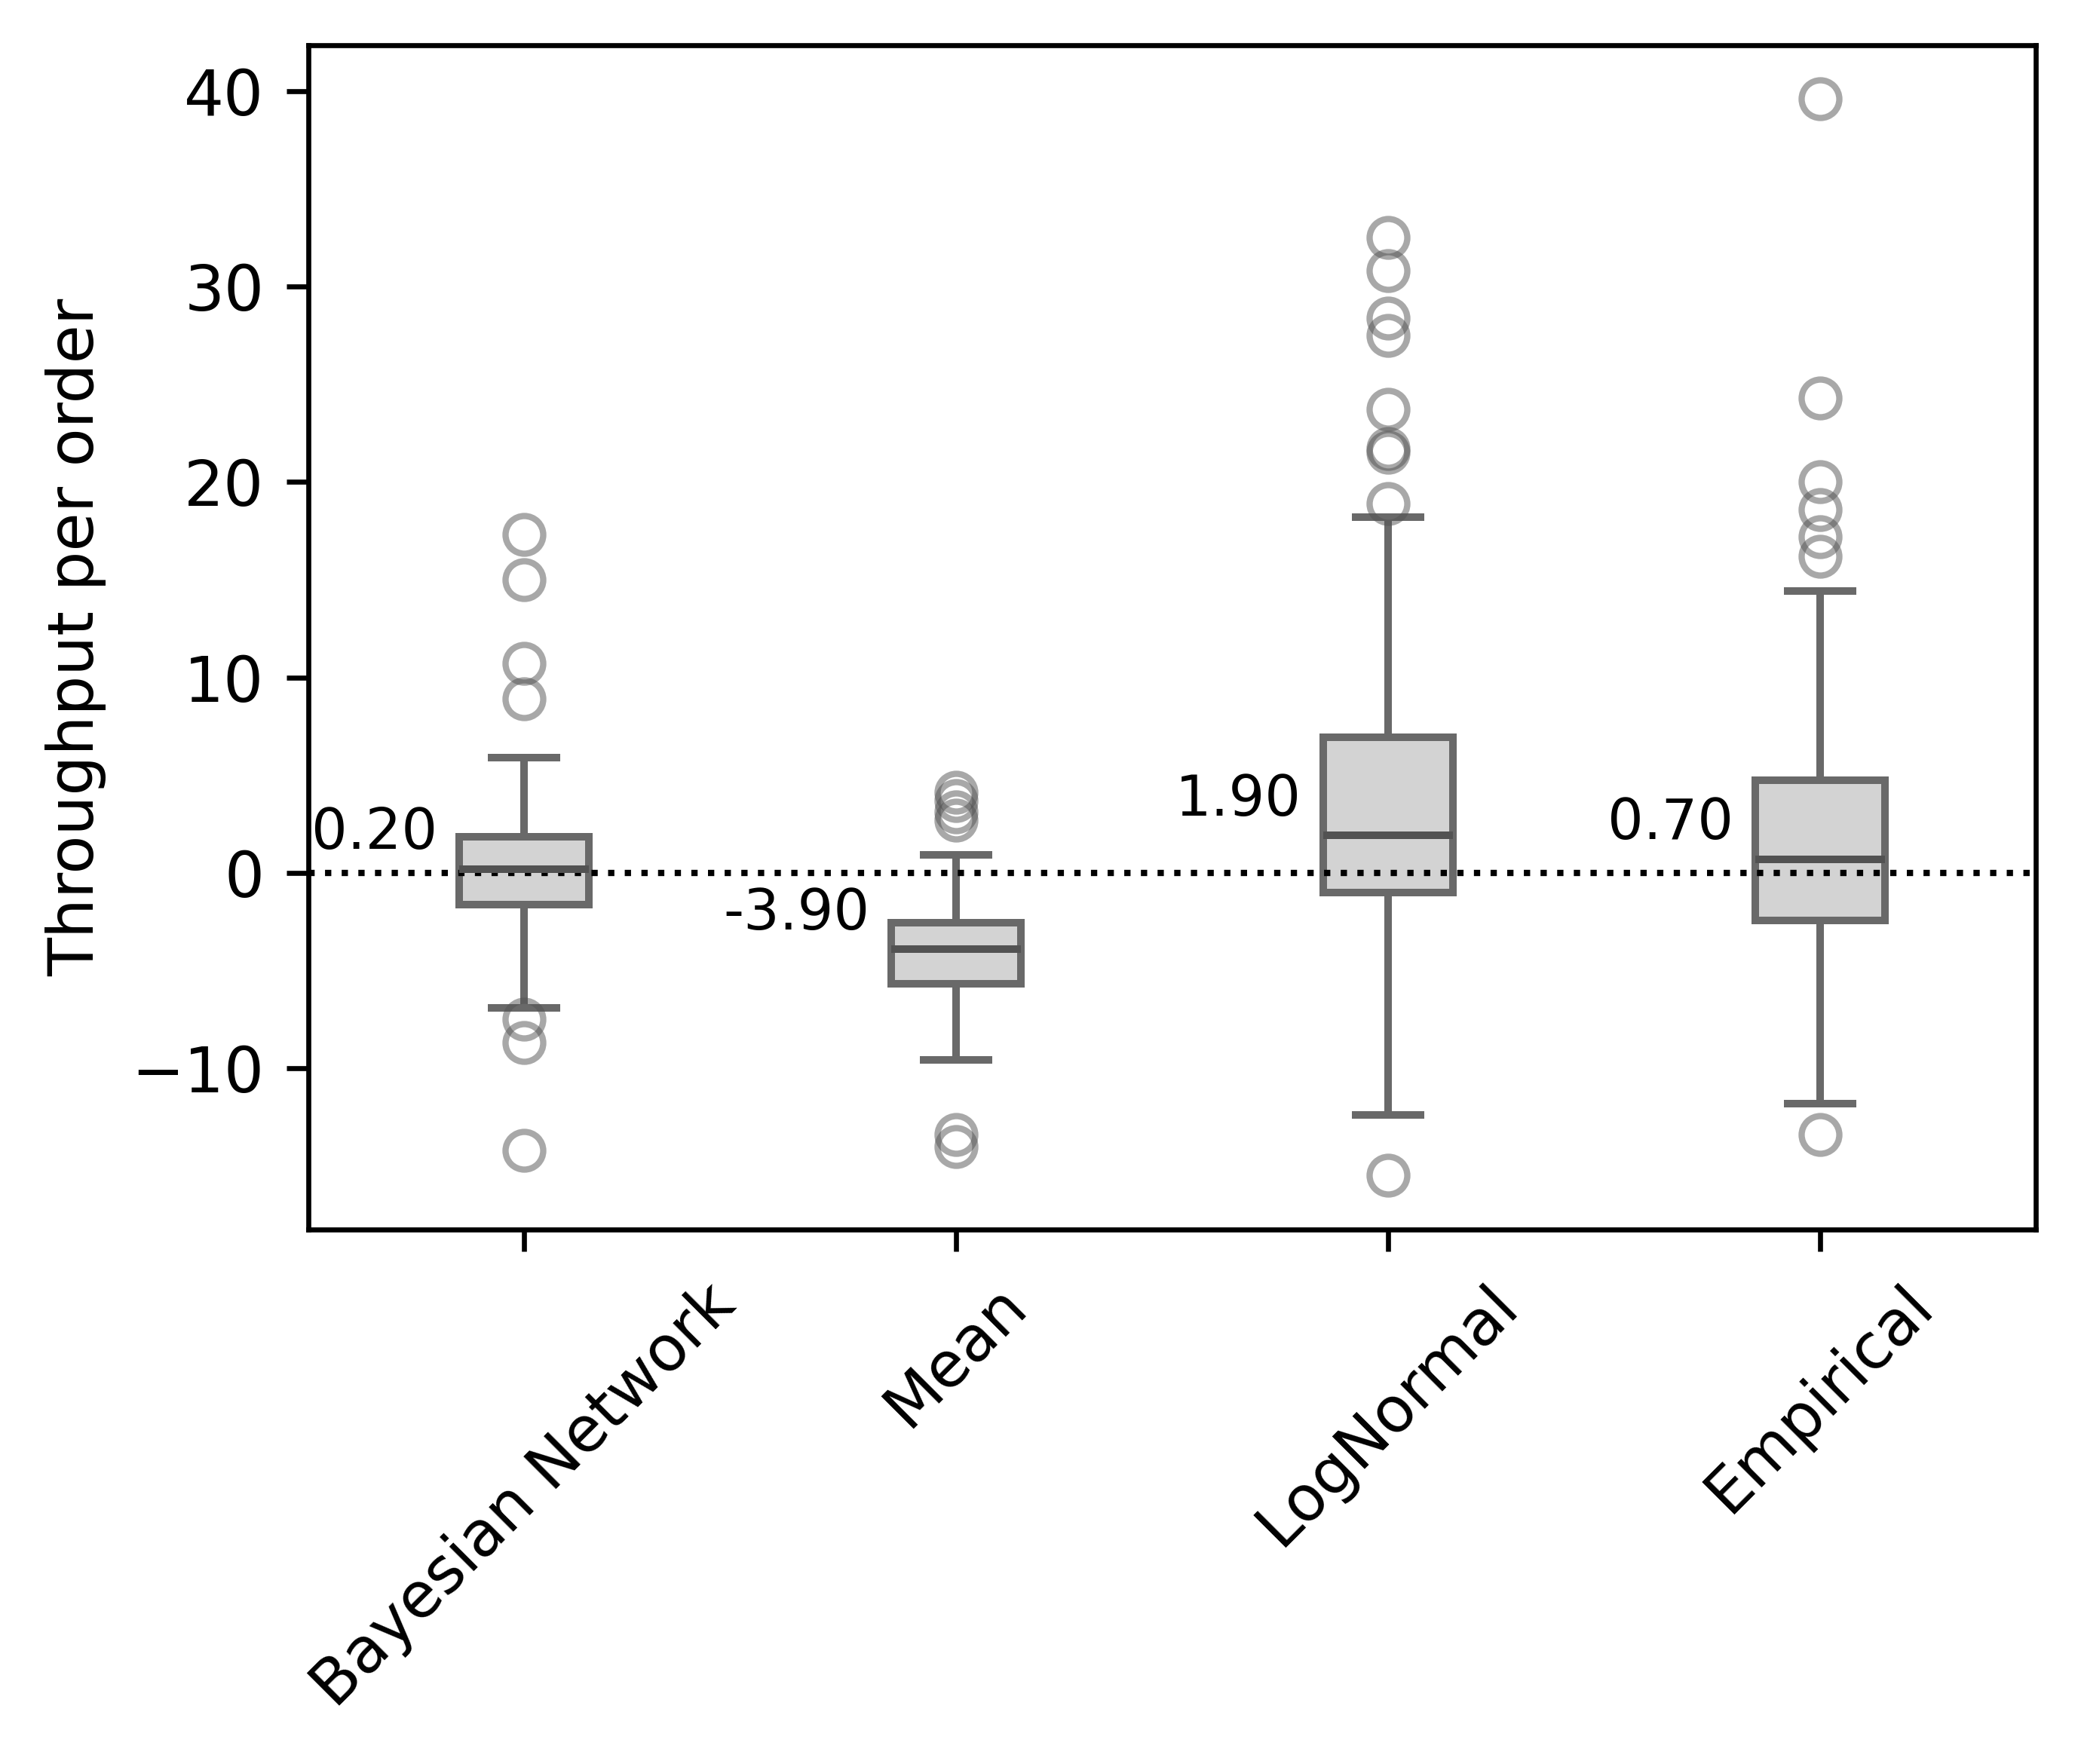

In [97]:
import seaborn as sns

plt.figure(figsize=(4.7,4), dpi=600)
# Use a subtle grey palette for low color
palette = sns.color_palette(['#bbbbbb', '#888888', '#aaaaaa', '#cccccc', '#dddddd', '#999999'])

# Boxplot with additional information for throughput
ax = sns.boxplot(
    x='Model_renamed',
    y='throughput',
    data=df,
    width=0.3,
    palette=palette,
    showfliers=True,
    linewidth=1.2,
    boxprops=dict(facecolor='lightgray', edgecolor='dimgray'),
    whiskerprops=dict(color='dimgray'),
    capprops=dict(color='dimgray'),
    #medianprops=dict(color='black', linewidth=1.5),
    flierprops=dict(marker='o', color='red', alpha=0.5)
)



# ax = sns.violinplot(
#     x='Model_renamed',
#     y='throughput',
#     data=df,
#     inner='quartile',
#     palette=palette,
#     linewidth=1.2
# )

# Overlay mean and std as points and error bars
means = df.groupby('Model_renamed')['throughput'].mean()
median = df.groupby('Model_renamed')['throughput'].median()
stds = df.groupby('Model_renamed')['throughput'].std()
x_pos = range(len(means))
#ax.errorbar(x=x_pos , y=means, yerr=stds, fmt='o', color='black', capsize=5)
#ax.errorbar(x=[pos + 0.3 for pos in x_pos], y=means, yerr=stds, fmt='o', color='black', capsize=5)

# Annotate means above the error bars
# for i, m in enumerate(means):
#     ax.text(i - 0.2, m , f"{m:.2f}", ha='right', va='center', fontsize=9, color='black')
for i, m in enumerate(median):
    ax.text(i - 0.2, m + 1.8, f"{m:.2f}", ha='right', va='center', fontsize=9, color='black')
plt.title('', fontsize=10)
plt.xlabel('', fontsize=10)
plt.ylabel('Throughput per order', fontsize=10)
plt.axhline(0, color='black', linestyle=':', linewidth=1)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
#plt.legend(loc='upper right', fontsize=10)
plt.tight_layout()
plt.savefig("throughput.svg", format="svg")
plt.show()

/tmp/ipykernel_3728568/3813209257.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(
/tmp/ipykernel_3728568/3813209257.py:7: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  ax = sns.violinplot(
/tmp/ipykernel_3728568/3813209257.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  means = df.groupby('Model_renamed')['leven_a3_0_seq'].mean()
/tmp/ipykernel_3728568/3813209257.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and si

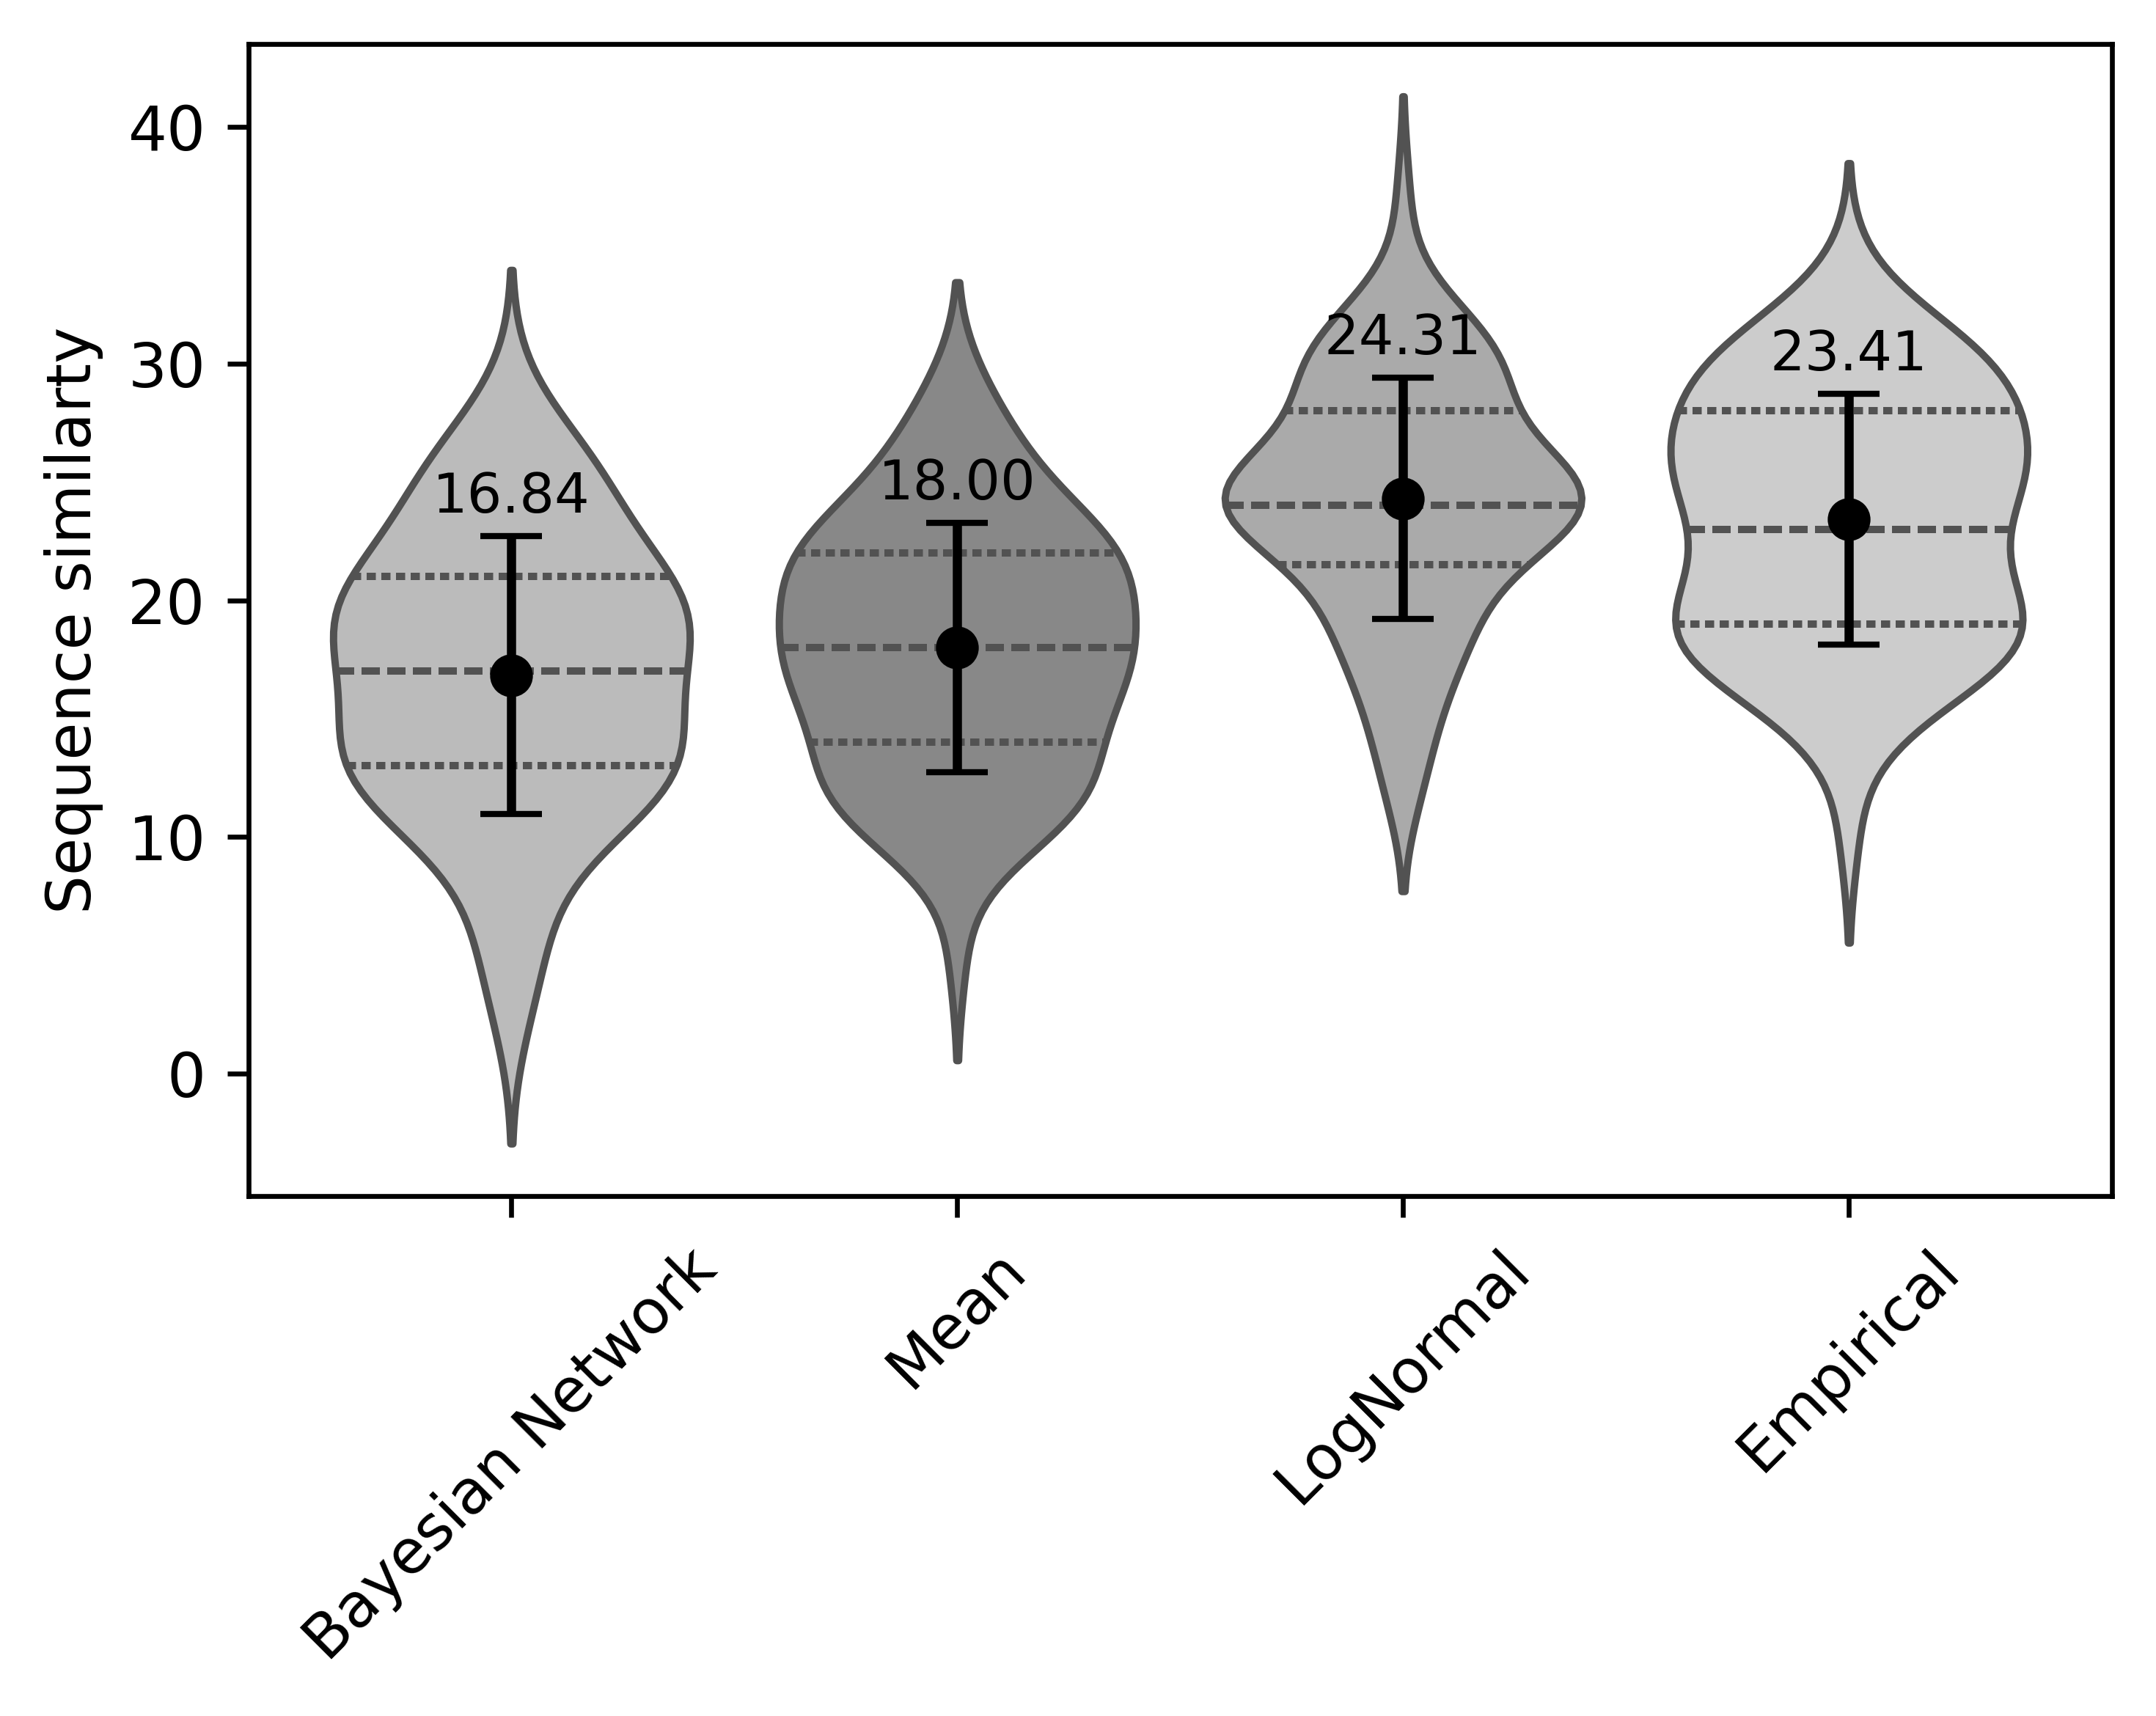

In [98]:
import seaborn as sns

plt.figure(figsize=(5,4), dpi=600)
# Use a subtle grey palette for low color
palette = sns.color_palette(['#bbbbbb', '#888888', '#aaaaaa', '#cccccc', '#dddddd', '#999999'])

ax = sns.violinplot(
    x='Model_renamed',
    y='leven_a3_0_seq',
    data=df,
    inner='quartile',
    palette=palette,
    linewidth=1.2
)

# Overlay mean and std as points and error bars
means = df.groupby('Model_renamed')['leven_a3_0_seq'].mean()
stds = df.groupby('Model_renamed')['leven_a3_0_seq'].std()
x_pos = range(len(means))
ax.errorbar(x=x_pos, y=means, yerr=stds, fmt='o', color='black', capsize=5)

# Annotate means above the error bars
for i, m in enumerate(means):
    ax.text(i, m + stds.iloc[i] + 0.5, f"{m:.2f}", ha='center', va='bottom', fontsize=9, color='black')

plt.title('', fontsize=10)
plt.xlabel('', fontsize=12)
plt.ylabel('Sequence similarty', fontsize=10)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
#plt.legend(loc='upper right', fontsize=10)
plt.tight_layout()
plt.savefig("seqsim.svg", format="svg")
plt.show()

/tmp/ipykernel_3728568/2452189017.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


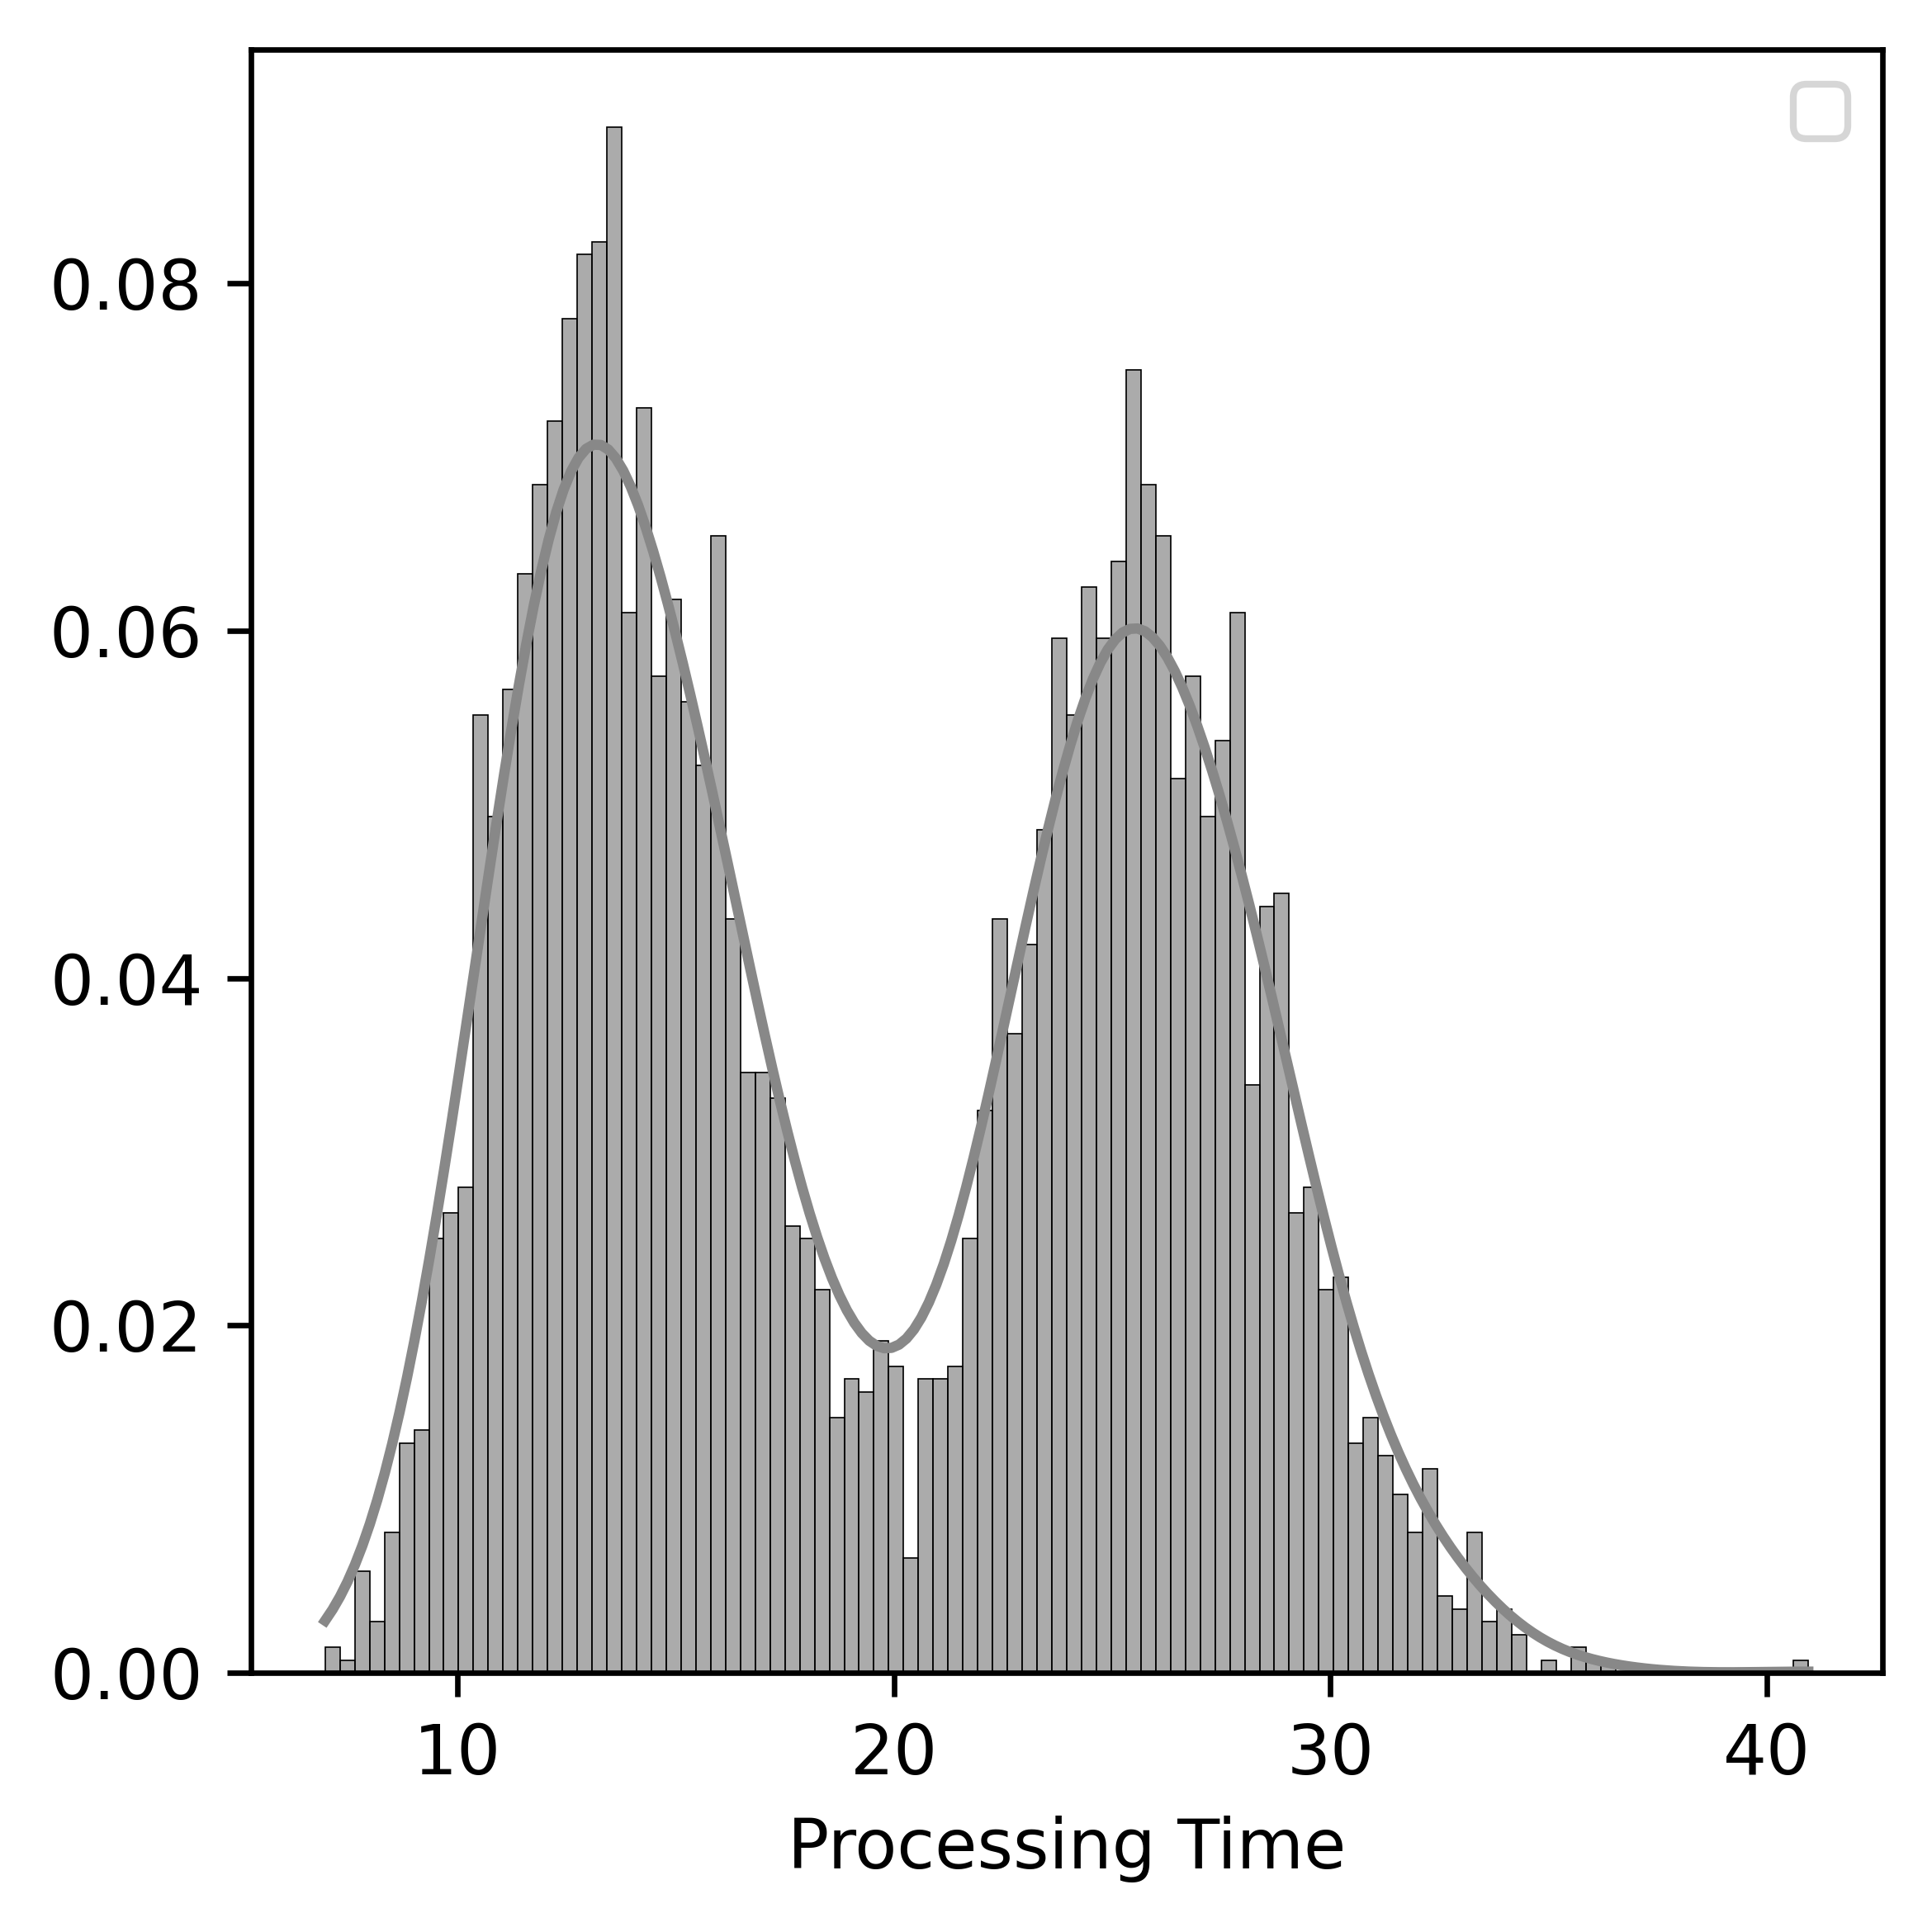

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file (adjust path as needed)
df_hist = pd.read_csv('output/experiments/20250505_215818/observe/data_observe_TruthContinousSmallLogCopyModel_2000_151.csv')  # Replace with your actual file path

# Prepare data
multiplier = 20
vals = df_hist['relative_processing_time_deviation'] * multiplier


plt.figure(figsize=(4,4), dpi=600)

# Plot histograms
sns.histplot(vals, color='#888888', kde=True, stat='density', bins=100, alpha=0.7)

plt.xlabel('Processing Time')
plt.ylabel('')
#plt.title('Histogram and KDE by Last Tool Change')
plt.legend()
plt.tight_layout()
plt.savefig("all_machines.svg", format="svg")
plt.show()

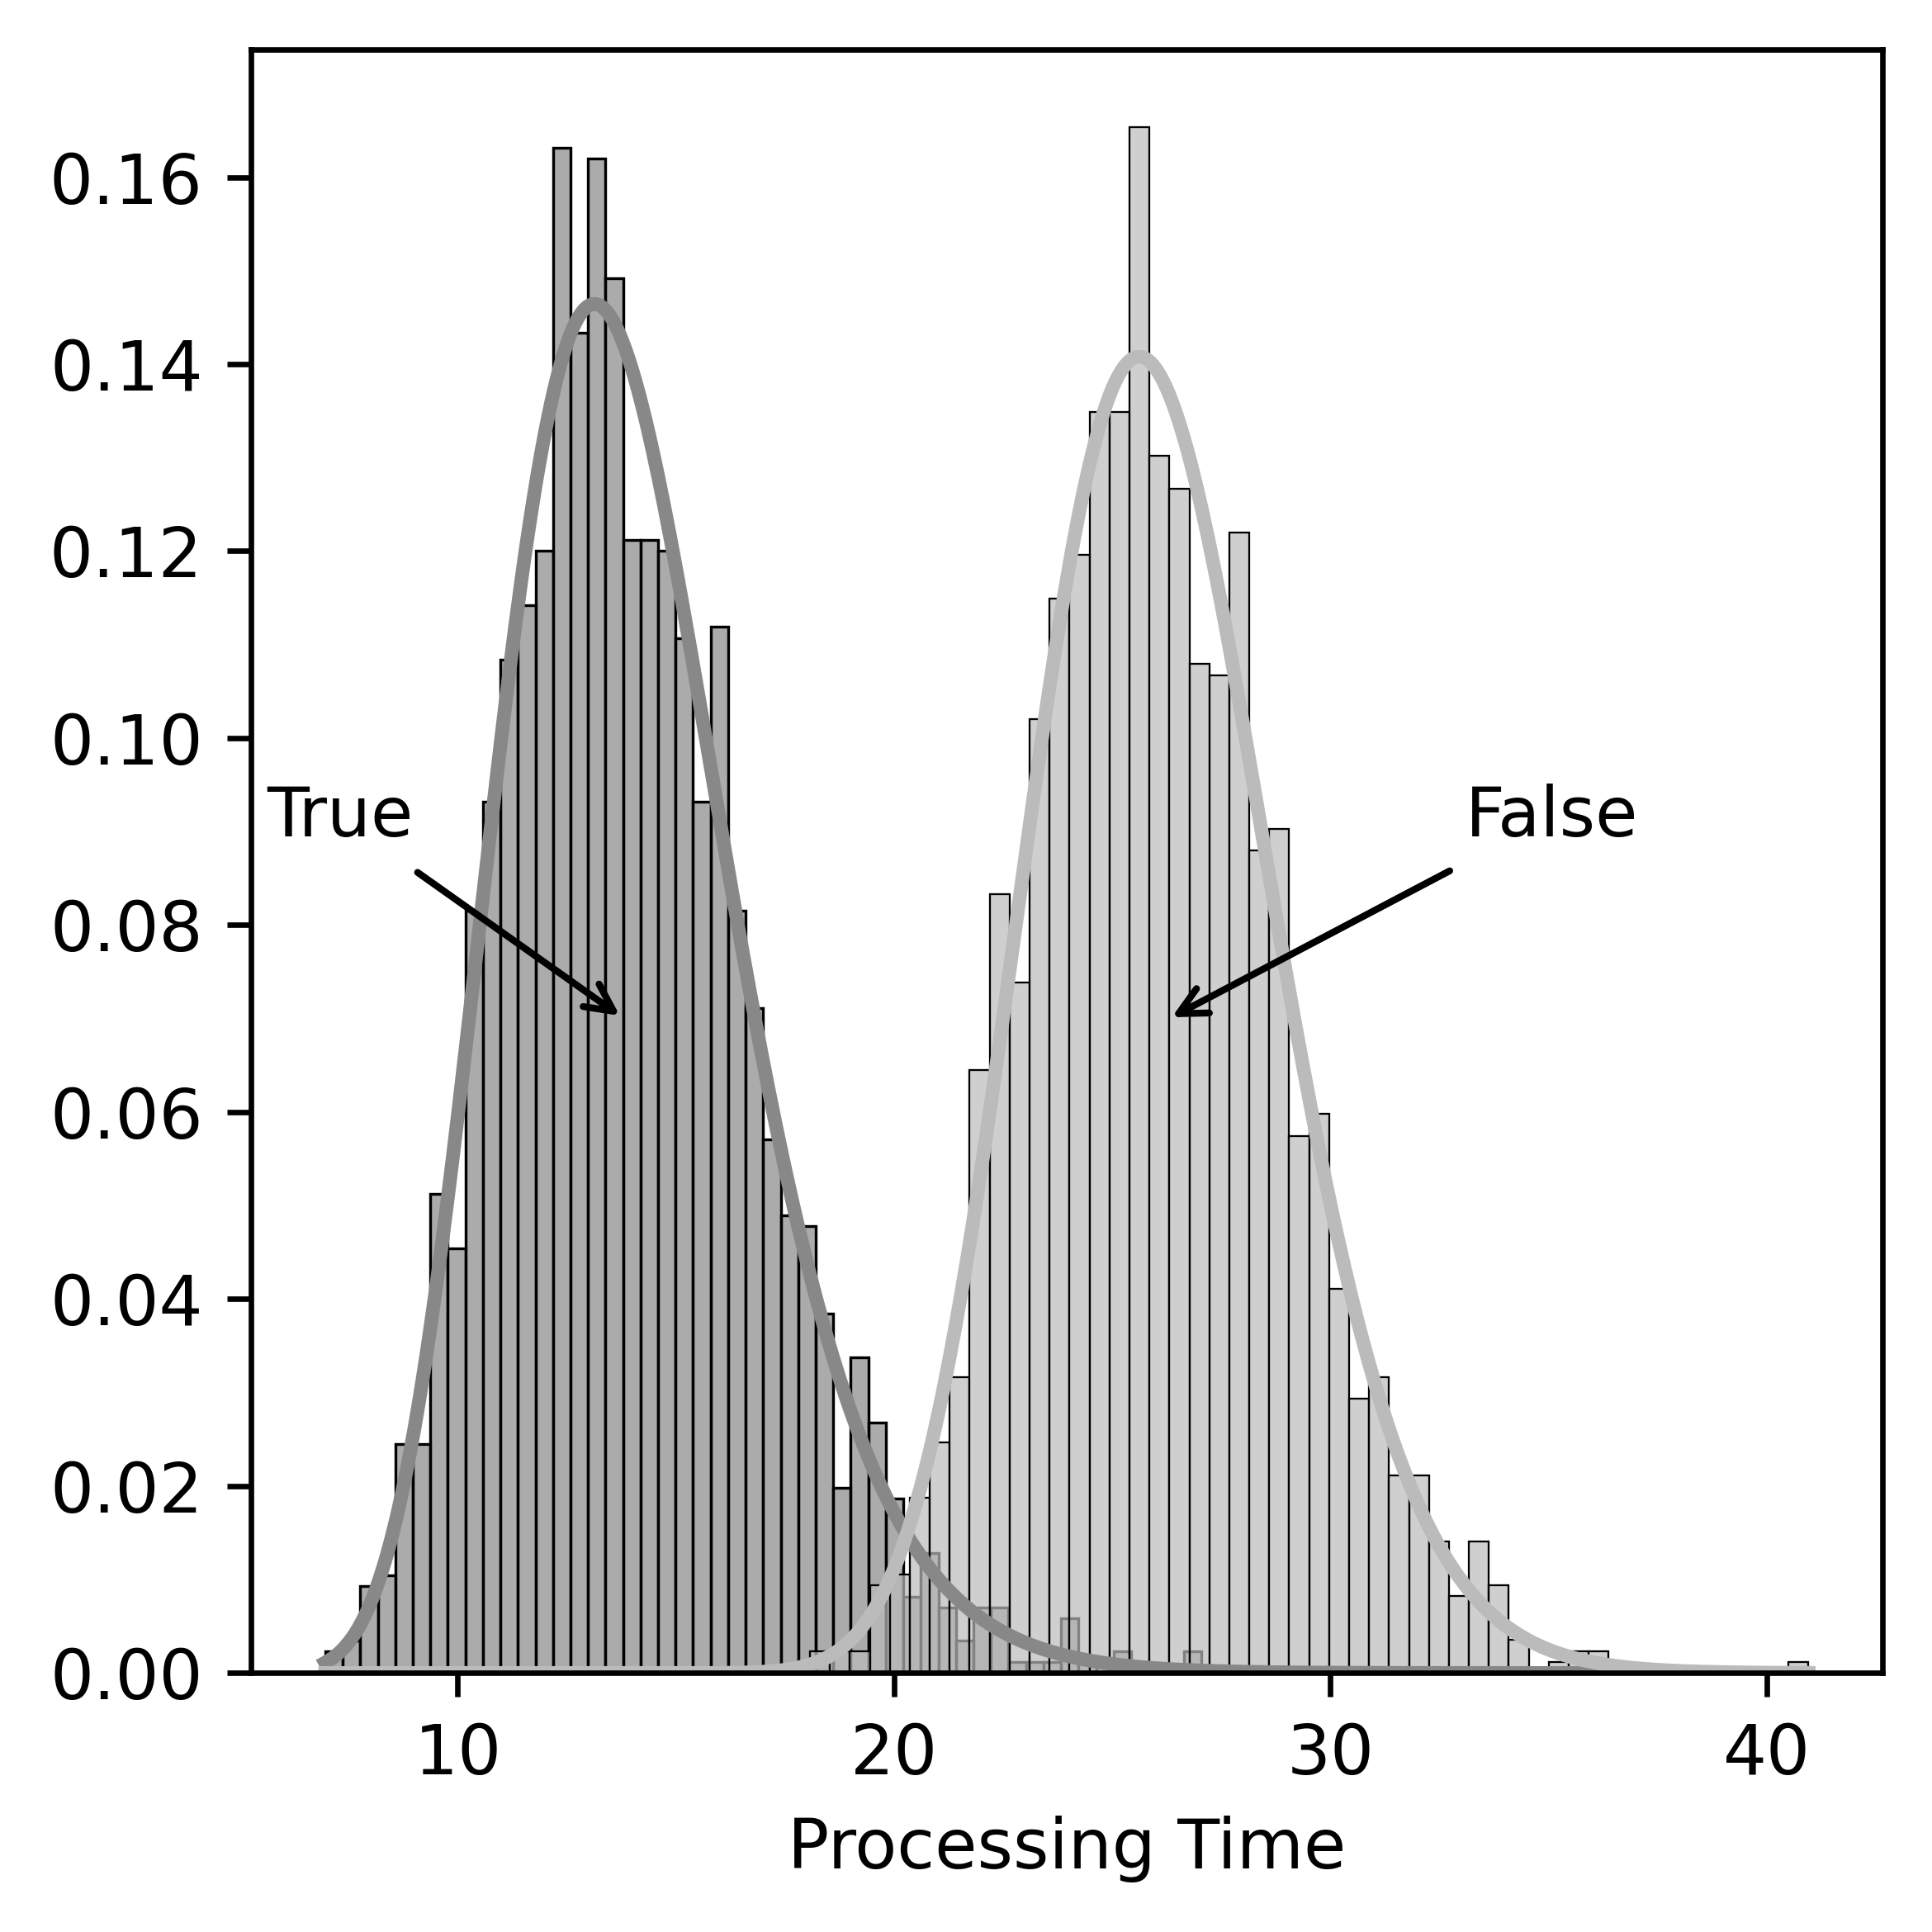

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import lognorm

# Split the values by last_tool_change
true_vals = df_hist[df_hist['last_tool_change'] == True]['relative_processing_time_deviation'] * multiplier
false_vals = df_hist[df_hist['last_tool_change'] == False]['relative_processing_time_deviation'] * multiplier

plt.figure(figsize=(4,4), dpi=600)

# Use grey tones for the histograms
sns.histplot(true_vals, color='#888888', kde=False, stat='density', bins=50, alpha=0.7)
sns.histplot(false_vals, color='#bbbbbb', kde=False, stat='density', bins=50, alpha=0.7)

# Fit lognormal distribution to each group
x = np.linspace(min(true_vals.min(), false_vals.min()), max(true_vals.max(), false_vals.max()), 500)

# True group lognormal fit
shape_true, loc_true, scale_true = lognorm.fit(true_vals, floc=0)
pdf_true = lognorm.pdf(x, shape_true, loc=loc_true, scale=scale_true)
plt.plot(x, pdf_true, color='#888888', linestyle='-', linewidth=2, label='LogNormal True')

# False group lognormal fit
shape_false, loc_false, scale_false = lognorm.fit(false_vals, floc=0)
pdf_false = lognorm.pdf(x, shape_false, loc=loc_false, scale=scale_false)
plt.plot(x, pdf_false, color='#bbbbbb', linestyle='-', linewidth=2, label='LogNormal False')

plt.xlabel('Processing Time')
plt.ylabel('')  # Remove y-axis label

# Add arrows and labels instead of legend
ymax_true = plt.gca().get_ylim()[1] * 0.4
ymax_false = plt.gca().get_ylim()[1] * 0.4
plt.annotate('True',
             xy=(true_vals.mean(), ymax_true),
             xytext=(true_vals.mean()-5, ymax_true+0.02),
             arrowprops=dict(facecolor='#888888', edgecolor='black', arrowstyle='->'),
             fontsize=10, color='black', ha='right')
plt.annotate('False',
             xy=(false_vals.mean(), ymax_false),
             xytext=(false_vals.mean()+7, ymax_false+0.02),
             arrowprops=dict(facecolor='#bbbbbb', edgecolor='black', arrowstyle='->'),
             fontsize=10, color='black', ha='left')

plt.tight_layout()
plt.savefig("all_machines_true_false.svg", format="svg")
plt.show()